## IMAGE CLASSIFICATION USING CIFAR-10

21bce202 Karan Patel

21bce214 Saurav Patel

In [2]:
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import  layers, models
from sklearn.preprocessing import OneHotEncoder 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from sklearn.neural_network import MLPClassifier
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [112]:
print(tf.__version__)

2.11.0


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into fivZe training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.


<table>
    <tbody><tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample"></td>
    </tr>
</tbody></table>

In [3]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
print(f"x_train shape: {X_train.shape} \ny_train shape: {Y_train.shape}")
print(f"x_test shape: {X_test.shape} \ny_test shape: {Y_test.shape}")

x_train shape: (50000, 32, 32, 3) 
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) 
y_test shape: (10000, 1)


In [6]:
X_train= X_train/255
X_test= X_test/255

In [7]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train=Y_train.ravel()
y_test=Y_test.ravel()

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
# X_train

In [11]:
print("x_train range ",np.amin(X_train), " to ",np.amax(X_train))

x_train range  0.0  to  1.0


c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

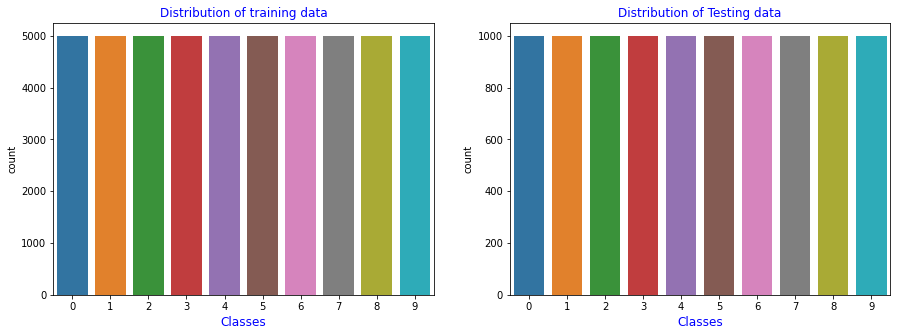

In [12]:
fig,axis = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y_train,ax=axis[0])
sns.countplot(y_test,ax=axis[1])
axis[0].set_title('Distribution of training data',{'fontsize':12,'color':'blue'})
axis[1].set_title('Distribution of Testing data',{'fontsize':12,'color':'blue'})
axis[0].set_xlabel('Classes',{'fontsize':12,'color':'blue'})
axis[1].set_xlabel('Classes',{'fontsize':12,'color':'blue'})

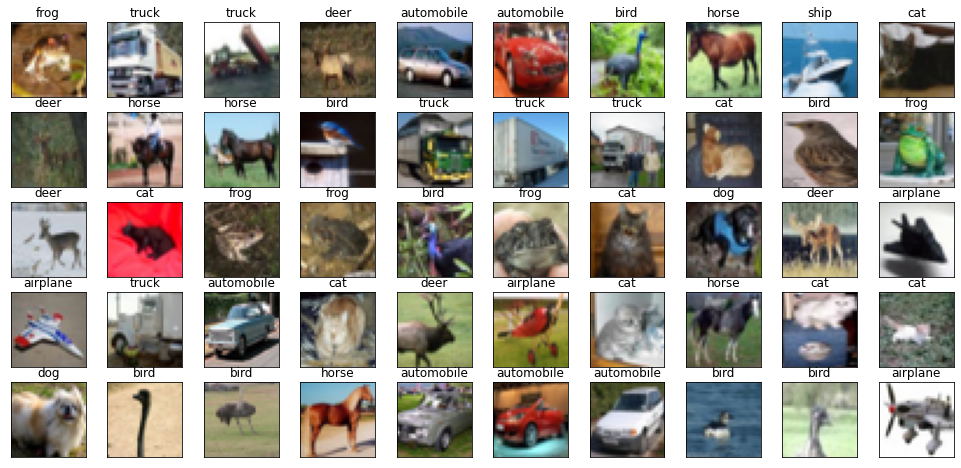

In [13]:
figure, axes = plt.subplots(ncols=10, nrows=5, figsize=(17, 8))
index = 0
for i in range(5):
    for j in range(10):
        axes[i,j].set_title(labels[Y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Reshaping the training data
50000 , 32 X 32 X 3 to 50000, 32x32x3=3072

In [14]:
a,b,c,d=X_train.shape
x_train=X_train.reshape((a,b*c*d))
a,b,c,d=X_test.shape
x_test=X_test.reshape((a,b*c*d))

print(f"x_train shape: {x_train.shape} \ny_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} \ny_test shape: {y_test.shape}")

x_train shape: (50000, 3072) 
y_train shape: (50000,)
x_test shape: (10000, 3072) 
y_test shape: (10000,)


### Feature Reduction

PCA is an unsupervised linear transformation technique.

It helps us to identify patterns in data based on the correlation betweeen features. In a nutshell , PCA aims at finding the directions of maximum variance in high-dimensional data and projects it onto a new subspace of lower or equal number of dimensions than original feature space.

Suppose we have a (n,d) dimensional data-set with d being the number of dimensions using PCA we create a (d,k) dimensional trnasformation matrix W that allows us to map a sample vector x onto a new k-dimensional feature subspace that has fewer dimensions than the original d-dimensional feature space. As a result the (n,d) dimension dataset get transformed into a (n,k) dimension data i.e. with k features.

These k-dimensions are automatically sorted in decreasing order of their importance i.e. the first principal component will have the largest possible variance.

PCA doesn’t delete any features to reduce dimensionality instead it kind of takes in all the features and outputs entirely new features by transforming them linearly.

In [15]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(x_train, y_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

to = datetime.datetime.now() - t0
print('PCA runtime:', to)

PCA runtime: 0:00:25.560161


In [16]:
print(f"x_train shape: {x_train_pca.shape} \ny_train shape: {y_train.shape}")
print(f"x_test shape: {x_test_pca.shape} \ny_test shape: {y_test.shape}")

x_train shape: (50000, 40) 
y_train shape: (50000,)
x_test shape: (10000, 40) 
y_test shape: (10000,)


# KNN

In [17]:
### Construct KNN model employment.
knn = KNeighborsClassifier(n_neighbors=16,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )     

In [18]:
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'accuracy')
CV_precision_score = cross_val_score(knn,x_train_pca, y_train, cv=10, scoring = 'precision_macro')
CV_recall_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'recall_macro')
CV_f1_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

KNN runtime: 0:00:15.594616


In [19]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.41184000000000004
average_precision: 0.4551619044821008
average_recall: 0.41184000000000004
average_f1: 0.4066666807880785


### Predict test set

In [20]:
knn = knn.fit(x_train_pca, y_train)

In [27]:
pickle.dump(knn,open('model_knn.pkl','wb'))

In [21]:
knn_pkl = pickle.load(open('model_knn.pkl','rb'))
knn_pred=knn_pkl.predict(x_test_pca)

In [22]:
print("Accuracy for KNN {} %".format(accuracy_score(y_test, knn_pred)*100))

Accuracy for KNN 42.58 %


### Heatmap of Confusion Matrix

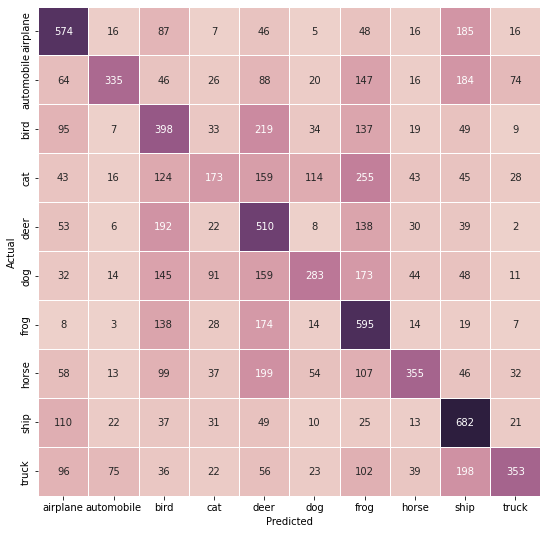

In [23]:
cm_knn=confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [24]:
print(classification_report(y_test,knn_pred,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.51      0.57      0.54      1000
  automobile       0.66      0.34      0.44      1000
        bird       0.31      0.40      0.35      1000
         cat       0.37      0.17      0.24      1000
        deer       0.31      0.51      0.38      1000
         dog       0.50      0.28      0.36      1000
        frog       0.34      0.59      0.44      1000
       horse       0.60      0.35      0.45      1000
        ship       0.46      0.68      0.55      1000
       truck       0.64      0.35      0.45      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.42     10000
weighted avg       0.47      0.43      0.42     10000



# DECISION TREE

Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [25]:
dt=DecisionTreeClassifier()
dt_fit=dt.fit(x_train_pca,y_train)

In [33]:
pickle.dump(dt,open('model_dt.pkl','wb'))

array([3, 9, 9, ..., 4, 6, 7], dtype=uint8)

In [26]:
dt_pkl = pickle.load(open('model_dt.pkl','rb'))
dt_pkl.predict(x_test_pca)

array([9, 9, 9, ..., 4, 6, 7], dtype=uint8)

In [27]:
pred_dt=dt_pkl.predict(x_test_pca)

In [28]:
print("Accuracy for Decision Tree {} %".format(accuracy_score(y_test, pred_dt)*100))

Accuracy for Decision Tree 27.63 %


### Heatmap of Confusion Matrix

In [29]:
cm_dt=confusion_matrix(y_test,pred_dt)
# print(cm_dt)

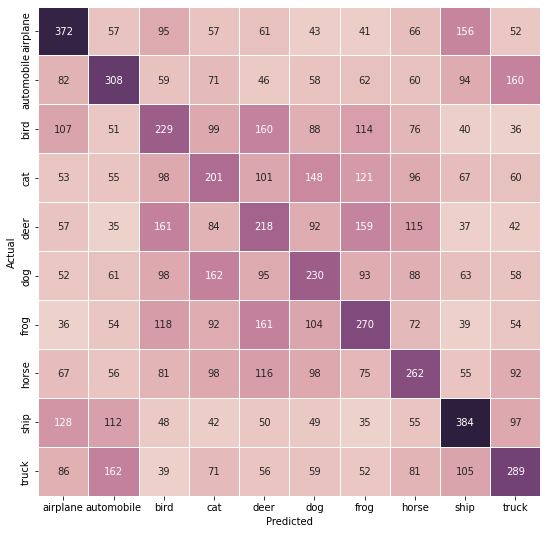

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [31]:
print(classification_report(y_test,pred_dt,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.36      0.37      0.36      1000
  automobile       0.32      0.31      0.32      1000
        bird       0.22      0.23      0.23      1000
         cat       0.21      0.20      0.20      1000
        deer       0.20      0.22      0.21      1000
         dog       0.24      0.23      0.23      1000
        frog       0.26      0.27      0.27      1000
       horse       0.27      0.26      0.27      1000
        ship       0.37      0.38      0.38      1000
       truck       0.31      0.29      0.30      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



In [55]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(150,150))
# plot_tree(dt_fit)
# plt.show()

# RANDOMM FOREST

In [32]:
rf=RandomForestClassifier(n_estimators=1500)

In [36]:
rf_fit=rf.fit(x_train_pca, y_train)

In [33]:
# pickle.dump(dt,open('model_rf.pkl','wb'))

In [34]:
rf_pkl = pickle.load(open('model_rf.pkl','rb'))
rf_pkl.predict(x_test_pca)

array([9, 9, 9, ..., 4, 6, 7], dtype=uint8)

In [36]:
pred_rf=rf_pkl.predict(x_test_pca)

In [37]:
print("Accuracy for Random Forest {} %".format(accuracy_score(y_test, pred_rf)*100))

Accuracy for Random Forest 27.63 %


In [38]:
cm_rf=confusion_matrix(y_test,pred_rf)
# print(cm_dt)

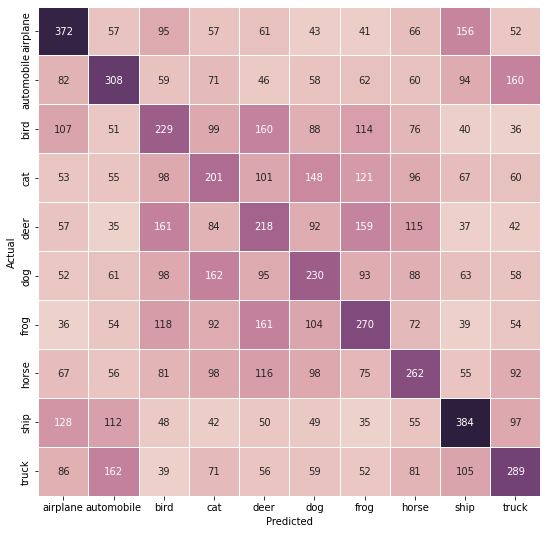

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

In [40]:
print(classification_report(y_test,pred_dt,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.36      0.37      0.36      1000
  automobile       0.32      0.31      0.32      1000
        bird       0.22      0.23      0.23      1000
         cat       0.21      0.20      0.20      1000
        deer       0.20      0.22      0.21      1000
         dog       0.24      0.23      0.23      1000
        frog       0.26      0.27      0.27      1000
       horse       0.27      0.26      0.27      1000
        ship       0.37      0.38      0.38      1000
       truck       0.31      0.29      0.30      1000

    accuracy                           0.28     10000
   macro avg       0.28      0.28      0.28     10000
weighted avg       0.28      0.28      0.28     10000



# Using Ensemble Techniques <br>
Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

1) Bagging (Boostrap Agregation) -> Random Forest <br>
2) Boosting -> AdaBoost, GradientBoosting, XgBoost (Extreme Gradient Boosting)

Decision Tree -> suffers Overfitting (since decision made will work fine for train set but poorly on test set) -> Low bias, High variance <br>
Random Forest -> Combines multiple DT which reduces the variance, hence gives better solution than DT 

# Boosting
Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers.
Firstly, a model is built from the training data.Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 

# 1. ADABOOST (ADAPTIVE BOOSTING)
DP which are incorrectly predicted are given more imporatance by increasing weight by LR, weight is decreased for DP which are correctly predicted

<img src="ada.png"/> <br/>>reference for photo=https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()

In [56]:
ada_fit=ADA.fit(x_train,y_train)

In [57]:
pickle.dump(ada_fit,open('model_ada.pkl','wb'))


In [42]:
ada_pkl = pickle.load(open('model_ada.pkl','rb'))
pred_ada=ada_pkl.predict(x_test)

In [43]:
print("Accuracy for ADABOOST {} %".format(accuracy_score(y_test, pred_ada)*100))

Accuracy for ADABOOST 31.080000000000002 %


### Heatmap of Confusion Matrix

In [44]:
cm_ada=confusion_matrix(y_test,pred_ada)
# print(cm_dt)

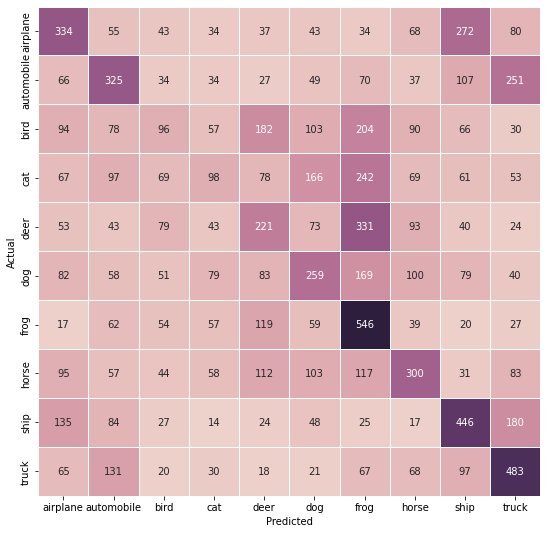

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_ada, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [64]:
print(classification_report(y_test,pred_ada,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.33      0.33      0.33      1000
  automobile       0.33      0.33      0.33      1000
        bird       0.19      0.10      0.13      1000
         cat       0.19      0.10      0.13      1000
        deer       0.25      0.22      0.23      1000
         dog       0.28      0.26      0.27      1000
        frog       0.30      0.55      0.39      1000
       horse       0.34      0.30      0.32      1000
        ship       0.37      0.45      0.40      1000
       truck       0.39      0.48      0.43      1000

    accuracy                           0.31     10000
   macro avg       0.30      0.31      0.30     10000
weighted avg       0.30      0.31      0.30     10000



# 2. Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier()

In [67]:
# gbc_fit=GBC.fit(x_train,y_train)

In [68]:
# pickle.dump(gbc_fit,open('model_gbc.pkl','wb'))
# gbc_pkl = pickle.load(open('model_gbc.pkl','rb'))

In [69]:
# pred_gbc=gbc_pkl.predict(X_test)

In [70]:
# print("Accuracy for Gradient Boosting {} %".format(accuracy_score(y_test, pred_gbc)*100))

### Heatmap of Confusion Matrix

In [71]:
# cm_gbc=confusion_matrix(y_test,pred_gbc)
# print(cm_dt)

In [72]:
# plt.figure(figsize=(9,9))
# sns.heatmap(cm_gbc, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

#### Classification Report

In [73]:
# print(classification_report(y_test,pred_gbc,target_names=labels))

# 3. TheXGBOOST (Extreme Gradient Boosting)

In [46]:
import xgboost as xgb
XGB = xgb.XGBClassifier(gamma=0.5, learning_rate=0.1, max_delta_step=0.1, 
                        max_depth=10, min_child_weight=1, n_estimators=100, 
                        nthread=4, objective='multi:logistic', reg_alpha=0.5, 
                        reg_lambda=0.8,subsample=0.8)

In [75]:
xgb_fit=XGB.fit(x_train,y_train,verbose=1)

In [76]:
pickle.dump(xgb_fit,open('model_xgb.pkl','wb'))

In [47]:
xgb_pkl = pickle.load(open('model_xgb.pkl','rb'))

In [48]:
pred_xgb=xgb_pkl.predict(x_test)

In [49]:
print("Accuracy for XGBOOST {} %".format(accuracy_score(y_test, pred_xgb)*100))

Accuracy for XGBOOST 43.1 %


### Heatmap of Confusion Matrix

In [50]:
cm_xgb=confusion_matrix(y_test,pred_xgb)
# print(cm_dt)

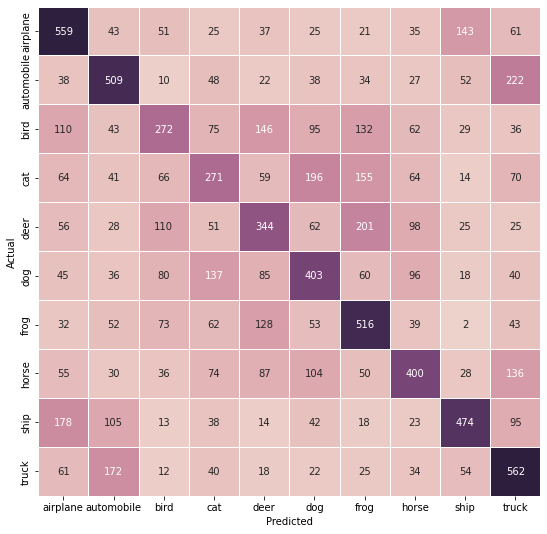

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_xgb, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [52]:
print(classification_report(y_test,pred_xgb,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.47      0.56      0.51      1000
  automobile       0.48      0.51      0.49      1000
        bird       0.38      0.27      0.32      1000
         cat       0.33      0.27      0.30      1000
        deer       0.37      0.34      0.35      1000
         dog       0.39      0.40      0.40      1000
        frog       0.43      0.52      0.47      1000
       horse       0.46      0.40      0.43      1000
        ship       0.56      0.47      0.52      1000
       truck       0.44      0.56      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.43     10000
weighted avg       0.43      0.43      0.43     10000



# ANN

In [53]:
ann = models.Sequential(
                [layers.Flatten(input_shape=(32,32,3)),
                 layers.Dense(3000,activation='relu'),
                 layers.Dense(1000,activation='sigmoid')])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [145]:
ann_fit=ann.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 144s 91ms/step - loss: 1.9321 - accuracy: 0.3248 - val_loss: 1.7237 - val_accuracy: 0.3847
Epoch 2/50
1563/1563 [==============================] - 138s 88ms/step - loss: 1.7017 - accuracy: 0.4004 - val_loss: 1.6413 - val_accuracy: 0.4202
Epoch 3/50
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6160 - accuracy: 0.4320 - val_loss: 1.7846 - val_accuracy: 0.3428
Epoch 4/50
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5577 - accuracy: 0.4566 - val_loss: 1.7047 - val_accuracy: 0.3807
Epoch 5/50
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5124 - accuracy: 0.4734 - val_loss: 1.7112 - val_accuracy: 0.3965
Epoch 6/50
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4736 - accuracy: 0.4857 - val_loss: 1.4935 - val_accuracy: 0.4720
Epoch 7/50
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4374 - accuracy: 0.4979 - val_loss: 1

In [146]:
pickle.dump(ann_fit,open('model_ann.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-27 23:53:45         1576
metadata.json                                  2022-11-27 23:53:45           64
variables.h5                                   2022-11-27 23:53:45     97780832


In [55]:
ann_pkl = pickle.load(open('model_ann.pkl','rb'))
print(ann_pkl)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-11-27 23:53:44         1576
metadata.json                                  2022-11-27 23:53:44           64
variables.h5                                   2022-11-27 23:53:44     97780832
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars


In [59]:
pred_ann=ann.predict(X_test)

313/313 [==============================] - 7s 23ms/step


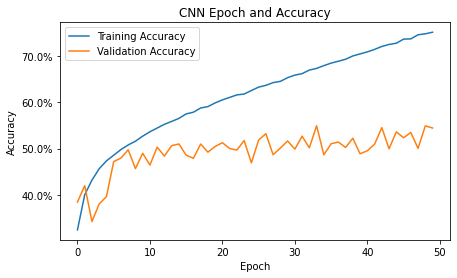

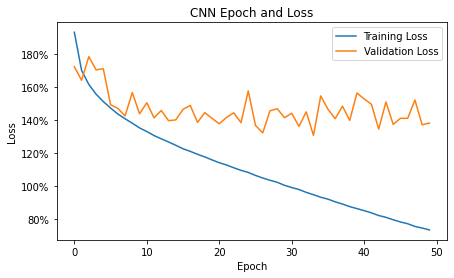

In [ ]:
plt.figure
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

#Accuracy
plt.plot(ann_fit.epoch,ann_fit.history['accuracy'],label="Training Accuracy")
plt.plot(ann_fit.epoch,ann_fit.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


#Loss
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(ann_fit.epoch,ann_fit.history['loss'],label="Training Loss")
plt.plot(ann_fit.epoch,ann_fit.history['val_loss'],label="Validation Loss")
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [152]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_9 (Dense)             (None, 1000)              3001000   
                                                                 
Total params: 12,220,000
Trainable params: 12,220,000
Non-trainable params: 0
_________________________________________________________________


### Heatmap of Confusion Metrix

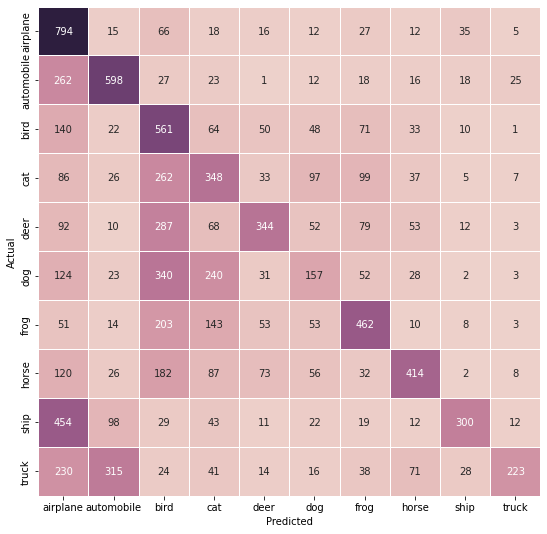

In [154]:
pred_ann_t=np.argmax(pred_ann,axis=1)
cm_ann=confusion_matrix(y_test,pred_ann_t)
# print(cm_dt)
plt.figure(figsize=(9,9))
sns.heatmap(cm_ann, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidth=0.69)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [157]:
print("Accuracy for ANN {} %".format(accuracy_score(y_test, pred_ann_t)*100))

Accuracy for ANN 42.01 %


# CNN

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
y_train, y_test = Y_train.flatten(), Y_test.flatten()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [62]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [63]:
cnn_model = models.Sequential()
cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape,padding='same'))
cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu',padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))


cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu',padding='same'))
cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu',padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))


cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu',padding='same'))
cnn_model.add(Conv2D(filters = 1024, kernel_size = (3,3), activation = 'relu',padding='same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 2048, activation = 'relu'))
cnn_model.add(Dense(units = 2048, activation = 'relu'))

cnn_model.add(Dense(units = 2048, activation = 'relu'))

cnn_model.add(Dense(units = 2048, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [64]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 1024)      28672     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 1024)      9438208   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 1024)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 1024)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 1024)      9438208   
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 1024)      9438208   
                                                      

In [65]:
cnn_model.compile(loss = 'categorical_crossentropy', 
                  optimizer='adam', 
                  metrics = ['accuracy'])

In [ ]:
cnn_fit = cnn_model.fit(X_train, y_train, epochs = 50 ,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 255s 161ms/step - loss: 1.3168 - accuracy: 0.5445 - val_loss: 0.9546 - val_accuracy: 0.6698
Epoch 2/50
1563/1563 [==============================] - 262s 168ms/step - loss: 0.8527 - accuracy: 0.7057 - val_loss: 0.8015 - val_accuracy: 0.7326
Epoch 3/50
1563/1563 [==============================] - 266s 170ms/step - loss: 0.7027 - accuracy: 0.7588 - val_loss: 0.7336 - val_accuracy: 0.7483
Epoch 4/50
1563/1563 [==============================] - 281s 180ms/step - loss: 0.5846 - accuracy: 0.8003 - val_loss: 0.6969 - val_accuracy: 0.7704
Epoch 5/50
1563/1563 [==============================] - 278s 178ms/step - loss: 0.5057 - accuracy: 0.8244 - val_loss: 0.5917 - val_accuracy: 0.8060
Epoch 6/50
1563/1563 [==============================] - 290s 186ms/step - loss: 0.4292 - accuracy: 0.8509 - val_loss: 0.6811 - val_accuracy: 0.7796
Epoch 7/50
1563/1563 [==============================] - 277s 177ms/step - loss: 0.3602 - accuracy: 0.8741 - val_

In [ ]:
pickle.dump(cnn_fit,open('model_cnn.pkl','wb'))
cnn_pkl = pickle.load(open('model_cnn.pkl','rb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_5
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...l

In [ ]:
cnn_pred=cnn_model.predict(X_test)

313/313 [==============================] - 15s 47ms/step


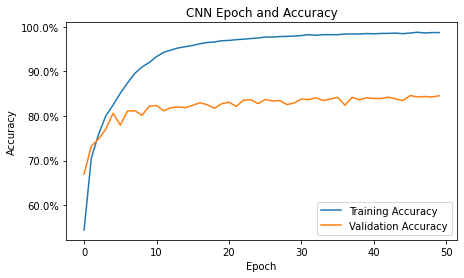

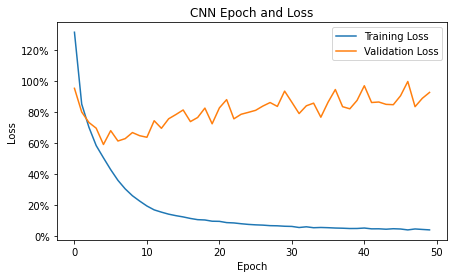

In [ ]:
plt.figure
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

#Accuracy
plt.plot(cnn_fit.epoch,cnn_fit.history['accuracy'],label="Training Accuracy")
plt.plot(cnn_fit.epoch,cnn_fit.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


#Loss
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(cnn_fit.epoch,cnn_fit.history['loss'],label="Training Loss")
plt.plot(cnn_fit.epoch,cnn_fit.history['val_loss'],label="Validation Loss")
plt.legend(loc='best')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('CNN Epoch and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 15s 47ms/step - loss: 0.9281 - accuracy: 0.8452
Test Accuracy: 0.8452000021934509


### Heatmap of Confusion Matrix

In [ ]:
cnn_pred_t=np.argmax(cnn_pred,axis=1)

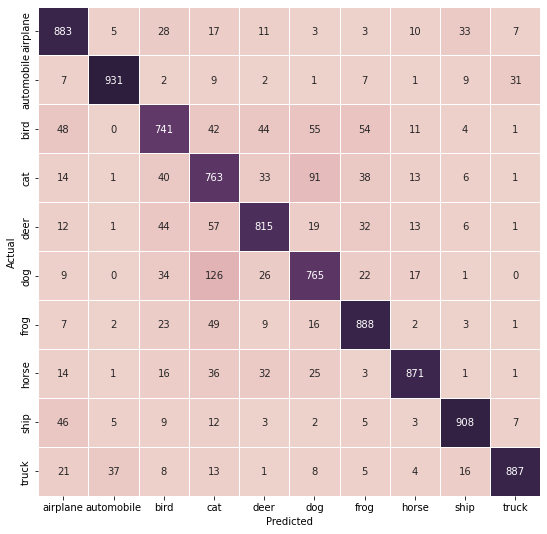

### Classification Summary

In [ ]:
print(classification_report(y_test,cnn_pred_t,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.83      0.88      0.86      1000
  automobile       0.95      0.93      0.94      1000
        bird       0.78      0.74      0.76      1000
         cat       0.68      0.76      0.72      1000
        deer       0.84      0.81      0.82      1000
         dog       0.78      0.77      0.77      1000
        frog       0.84      0.89      0.86      1000
       horse       0.92      0.87      0.90      1000
        ship       0.92      0.91      0.91      1000
       truck       0.95      0.89      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



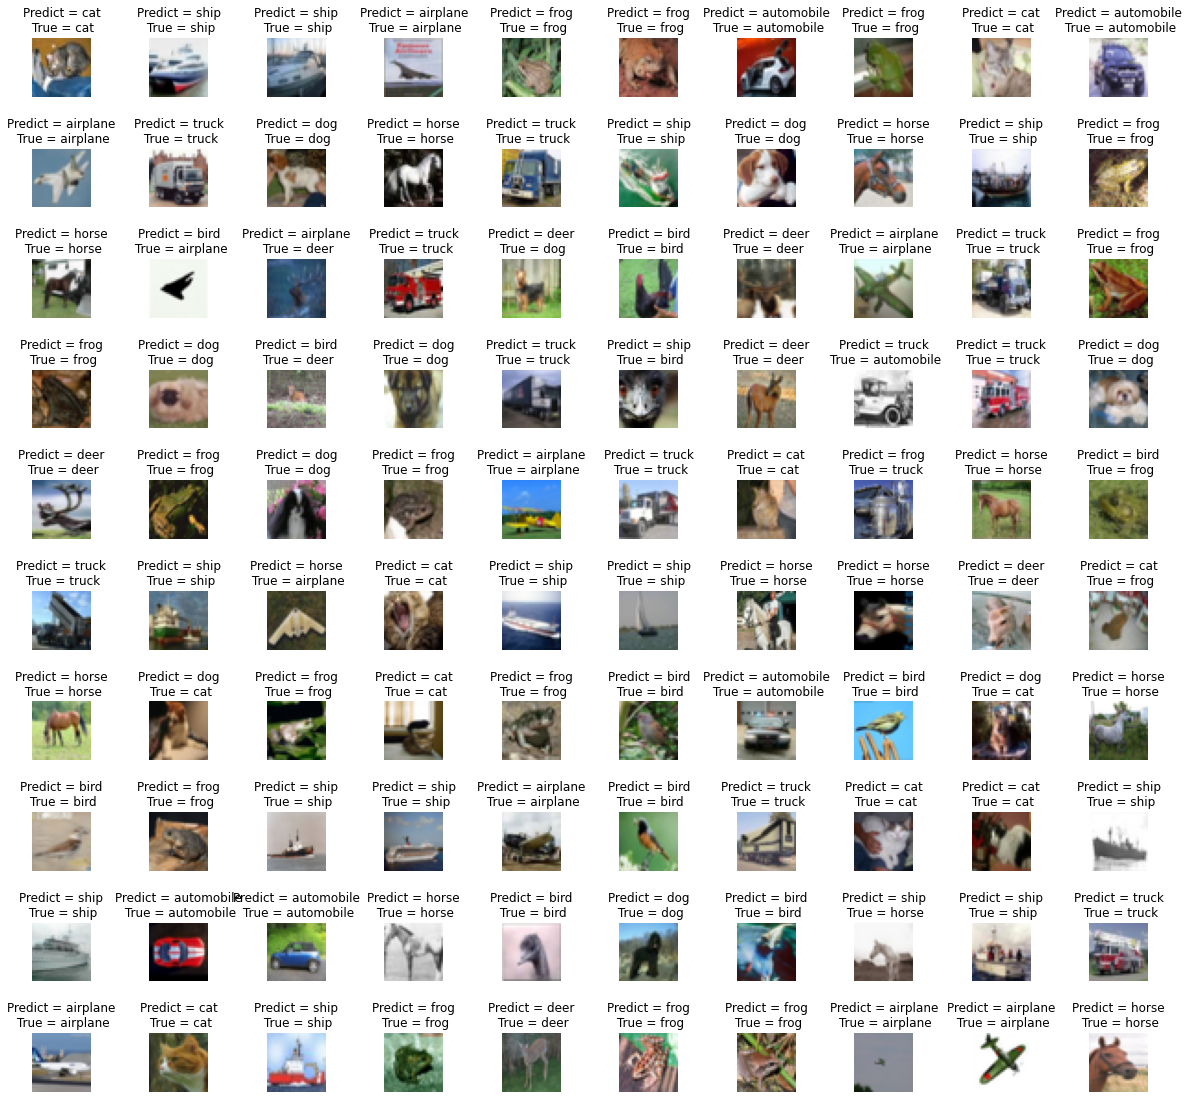

In [ ]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predict = {}\n True = {}'.format(labels[cnn_pred_t[i]], labels[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

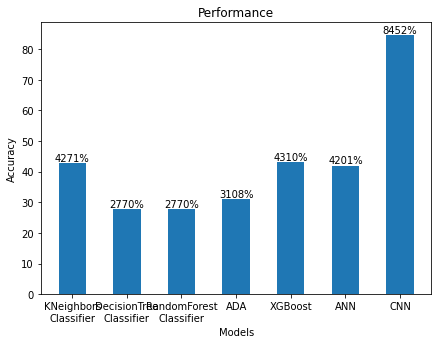

In [ ]:
acc1=accuracy_score(y_test, knn_pred)*100
acc2=accuracy_score(y_test, pred_dt)*100
acc3=accuracy_score(y_test, pred_rf)*100
acc4=accuracy_score(y_test, pred_ada)*100
acc5=accuracy_score(y_test, pred_xgb)*100
acc6=accuracy_score(y_test, pred_ann_t)*100
acc7=84.52


models = ["KNeighbors\nClassifier","DecisionTree\nClassifier","RandomForest\nClassifier","ADA\n","XGBoost\n","ANN\n","CNN\n"]
accuracy = [acc1,acc2,acc3,acc4,acc5,acc6,acc7]
plt.figure(figsize=(7,5))
plt.bar(models,accuracy,width=0.5)
for i in range(len(accuracy)):
    plt.text(i,accuracy[i],str(round(accuracy[i]*100))+"%",ha="center",va="bottom") # (x_coord,y_coord,value,)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance")
plt.show()